<h1><center><font size="25">Forecasting time series with LightGBM</font></center></h1>

<center><b>Joaquín Amat Rodrigo, Javier Escobar Ortiz</b></center>

<center><i>November 2024</i></center>

**More about forecasting**

+ [ARIMA and SARIMAX models with python](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html)
+ [Time series forecasting with machine learning](https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html)
+ [Forecasting time series with gradient boosting: XGBoost, LightGBM and CatBoost](https://www.cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html)
+ [Forecasting time series with XGBoost](https://cienciadedatos.net/documentos/py56-forecasting-time-series-with-xgboost.html)
+ [Global Forecasting Models: Multi-series forecasting](https://www.cienciadedatos.net/documentos/py44-multi-series-forecasting-skforecast.html)
+ [Global Forecasting Models: Comparative Analysis of Single and Multi-Series Forecasting Modeling](https://cienciadedatos.net/documentos/py53-global-forecasting-models.html)
+ [Probabilistic forecasting](https://www.cienciadedatos.net/documentos/py42-probabilistic-forecasting.html)
+ [Forecasting with deep learning](https://www.cienciadedatos.net/documentos/py54-forecasting-with-deep-learning.html)
+ [Forecasting energy demand with machine learning](https://www.cienciadedatos.net/documentos/py29-forecasting-electricity-power-demand-python.html)
+ [Forecasting web traffic with machine learning](https://www.cienciadedatos.net/documentos/py37-forecasting-web-traffic-machine-learning.html)
+ [Intermittent demand forecasting](https://www.cienciadedatos.net/documentos/py48-intermittent-demand-forecasting)
+ [Modelling time series trend with tree-based models](https://www.cienciadedatos.net/documentos/py49-modelling-time-series-trend-with-tree-based-models.html)
+ [Bitcoin price prediction with Python](https://www.cienciadedatos.net/documentos/py41-forecasting-cryptocurrency-bitcoin-machine-learning-python.html)
+ [Stacking ensemble of machine learning models to improve forecasting](https://cienciadedatos.net/documentos/py52-stacking-ensemble-models-forecasting.html)
+ [Interpretable forecasting models](https://cienciadedatos.net/documentos/py57-interpretable-forecasting-models.html)
+ [Mitigating the Impact of Covid on forecasting Models](https://cienciadedatos.net/documentos/py45-weighted-time-series-forecasting.html)
+ [Forecasting time series with missing values](https://cienciadedatos.net/documentos/py46-forecasting-time-series-missing-values.html)

<div style="text-align: center;">
    <img src="../images/banner-landing-page-skforecast.png" style="display: block; margin: 0 auto;">
</div>

## Introduction

Gradient boosting models have gained popularity in the machine learning community due to their ability to achieve excellent results in a wide range of use cases, including both regression and classification. Although these models have traditionally been less common in forecasting, they can be highly effective in this domain. Some of the key benefits of using gradient boosting models for forecasting include:

+ The ease with which exogenous variables can be included in the model, in addition to autoregressive variables.

+ The ability to capture non-linear relationships between variables.

+ High scalability, allowing models to handle large volumes of data.

+ Some implementations allow the inclusion of categorical variables without the need for additional encoding, such as one-hot encoding.

Despite these benefits, the use of machine learning models for forecasting can present several challenges that can make analysts reluctant to use them, the main ones being:

+ Transforming the data so that it can be used as a regression problem.

+ Depending on how many future predictions are needed (prediction horizon), an iterative process may be required where each new prediction is based on previous ones. 

+ Model validation requires specific strategies such as backtesting, walk-forward validation or time series cross-validation. Traditional cross-validation cannot be used.

The [**skforecast**](https://skforecast.org/) library provides automated solutions to these challenges, making it easier to apply and validate machine learning models to forecasting problems. The library supports several advanced gradient boosting models, including **LightGBM**.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

This document is a summary of a more comprehensive guide to using gradient boosting models for time series forecasting. The complete guide is available at <a href="https://cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html">Forecasting time series with gradient boosting: Skforecast, XGBoost, LightGBM, Scikit-learn and CatBoost</a>.

</div>

## Libraries


Libraries used in this document.

In [1]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
import lightgbm
import skforecast
import sklearn
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFECV
from skforecast.recursive import ForecasterRecursive
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.feature_selection import select_features
from skforecast.preprocessing import RollingFeatures
import shap

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version lightgbm: {lightgbm.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

/home/ec2-user/git-repos/skforecast/venv_skforecast_0.15/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Version skforecast: 0.15.0
Version scikit-learn: 1.5.2
Version lightgbm: 4.5.0
Version pandas: 2.2.3
Version numpy: 2.0.2


## Data

The data in this document represent the hourly usage of the bike share system in the city of Washington, D.C. during the years 2011 and 2012. In addition to the number of users per hour, information about weather conditions and holidays is available. The original data was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

In [2]:
# Downloading data
# ==============================================================================
data = fetch_dataset('bike_sharing_extended_features')
data.head(4)

bike_sharing_extended_features
------------------------------
Hourly usage of the bike share system in the city of Washington D.C. during the
years 2011 and 2012. In addition to the number of users per hour, the dataset
was enriched by introducing supplementary features. Addition includes calendar-
based variables (day of the week, hour of the day, month, etc.), indicators for
sunlight, incorporation of rolling temperature averages, and the creation of
polynomial features generated from variable pairs. All cyclic variables are
encoded using sine and cosine functions to ensure accurate representation.
Fanaee-T,Hadi. (2013). Bike Sharing Dataset. UCI Machine Learning Repository.
https://doi.org/10.24432/C5W894.
Shape of the dataset: (17352, 90)


,users,weather,month_sin,month_cos,week_of_year_sin,week_of_year_cos,week_day_sin,week_day_cos,hour_day_sin,hour_day_cos,...,temp_roll_mean_1_day,temp_roll_mean_7_day,temp_roll_max_1_day,temp_roll_min_1_day,temp_roll_max_7_day,temp_roll_min_7_day,holiday_previous_day,holiday_next_day,temp,holiday
date_time,,,,,,,,,,,,,,,,,,,,,
2011-01-08 00:00:00,25.0,mist,0.5,0.866025,0.120537,0.992709,-0.781832,0.62349,0.258819,0.965926,...,8.063334,10.127976,9.02,6.56,18.86,4.92,0.0,0.0,7.38,0.0
2011-01-08 01:00:00,16.0,mist,0.5,0.866025,0.120537,0.992709,-0.781832,0.62349,0.500000,0.866025,...,8.029166,10.113334,9.02,6.56,18.86,4.92,0.0,0.0,7.38,0.0
2011-01-08 02:00:00,16.0,mist,0.5,0.866025,0.120537,0.992709,-0.781832,0.62349,0.707107,0.707107,...,7.995000,10.103572,9.02,6.56,18.86,4.92,0.0,0.0,7.38,0.0
2011-01-08 03:00:00,7.0,rain,0.5,0.866025,0.120537,0.992709,-0.781832,0.62349,0.866025,0.500000,...,7.960833,10.093809,9.02,6.56,18.86,4.92,0.0,0.0,7.38,0.0


To facilitate the training of the models, the search for optimal hyperparameters and the evaluation of their predictive accuracy, the data are divided into three separate sets: training, validation and test.

In [3]:
# Split train-validation-test
# ==============================================================================
end_train = '2012-03-31 23:59:00'
end_validation = '2012-08-31 23:59:00'
data_train = data.loc[: end_train, :]
data_val   = data.loc[end_train:end_validation, :]
data_test  = data.loc[end_validation:, :]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validacion : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 2011-01-08 00:00:00 --- 2012-03-31 23:00:00  (n=10776)
Dates validacion : 2012-04-01 00:00:00 --- 2012-08-31 23:00:00  (n=3672)
Dates test       : 2012-09-01 00:00:00 --- 2012-12-30 23:00:00  (n=2904)


## Data exploration

Graphical exploration of time series can be an effective way of identifying trends, patterns, and seasonal variations. This, in turn, helps to guide the selection of the most appropriate forecasting model.

### Plot time series

**Full time series**

### Seasonality plots

Seasonal plots are a useful tool for identifying seasonal patterns and trends in a time series. They are created by averaging the values of each season over time and then plotting them against time.

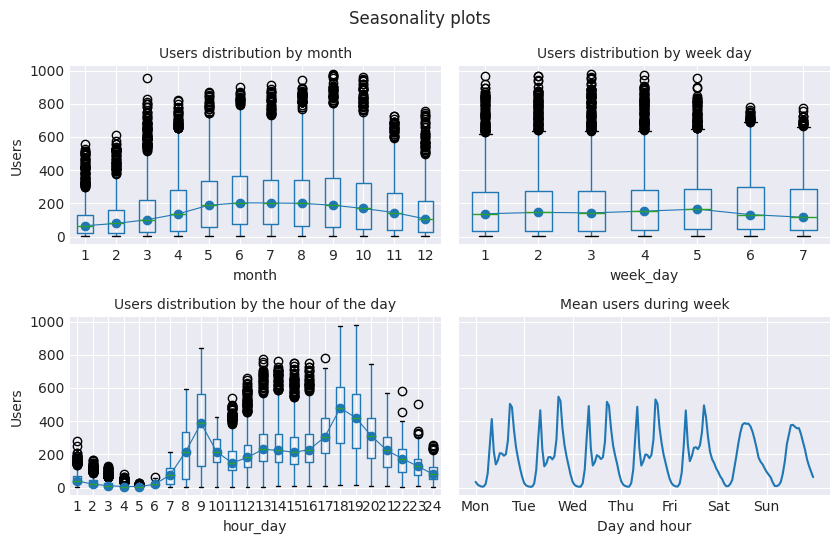

In [4]:
# Annual, weekly and daily seasonality
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=False, sharey=True)
axs = axs.ravel()

# Users distribution by month
data['month'] = data.index.month
data.boxplot(column='users', by='month', ax=axs[0])
data.groupby('month')['users'].median().plot(style='o-', linewidth=0.8, ax=axs[0])
axs[0].set_ylabel('Users')
axs[0].set_title('Users distribution by month', fontsize=10)

# Users distribution by week day
data['week_day'] = data.index.day_of_week + 1
data.boxplot(column='users', by='week_day', ax=axs[1])
data.groupby('week_day')['users'].median().plot(style='o-', linewidth=0.8, ax=axs[1])
axs[1].set_ylabel('Users')
axs[1].set_title('Users distribution by week day', fontsize=10)

# Users distribution by the hour of the day
data['hour_day'] = data.index.hour + 1
data.boxplot(column='users', by='hour_day', ax=axs[2])
data.groupby('hour_day')['users'].median().plot(style='o-', linewidth=0.8, ax=axs[2])
axs[2].set_ylabel('Users')
axs[2].set_title('Users distribution by the hour of the day', fontsize=10)

# Users distribution by week day and hour of the day
mean_day_hour = data.groupby(["week_day", "hour_day"])["users"].mean()
mean_day_hour.plot(ax=axs[3])
axs[3].set(
    title       = "Mean users during week",
    xticks      = [i * 24 for i in range(7)],
    xticklabels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel      = "Day and hour",
    ylabel      = "Number of users"
)
axs[3].title.set_size(10)

fig.suptitle("Seasonality plots", fontsize=12)
fig.tight_layout()

There is a clear difference between weekdays and weekends. There is also a clear intra-day pattern, with a different influx of users depending on the time of day.

### Autocorrelation plots

Auto-correlation plots are a useful tool for identifying the order of an autoregressive model. The autocorrelation function (ACF) is a measure of the correlation between the time series and a lagged version of itself. The partial autocorrelation function (PACF) is a measure of the correlation between the time series and a lagged version of itself, controlling for the values of the time series at all shorter lags. These plots are useful for identifying the lags to be included in the autoregressive model.

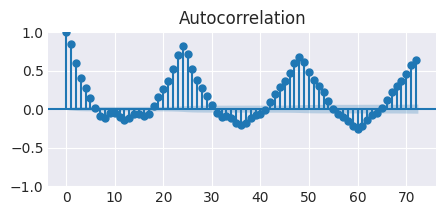

In [5]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(data['users'], ax=ax, lags=72)
plt.show()

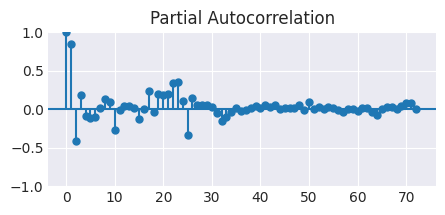

In [6]:
# Partial autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_pacf(data['users'], ax=ax, lags=72, method='ywm')
plt.show()

The results of the autocorrelation study show that there is a significant correlation between the number of users in previous hours, as well as the days before, and the number of users in the future. This means that knowing the number of users during certain periods in the past could be valuable in predicting the number of users in the future.

## Recursive multi-step forecasting with LightGBM

First, an [ForecasterAutoreg](https://skforecast.org/latest/user_guides/autoregresive-forecaster) model is trained using past values (lags) of the response variable as predictors. Later, exogenous variables are added to the model and the improvement in its performance is assessed. Since Gradient Boosting models have a large number of hyperparameters, a [Bayesian Search](https://skforecast.org/latest/user_guides/hyperparameter-tuning-and-lags-selection.html) is performed using the `bayesian_search_forecaster()` function to find the best combination of hyperparameters and lags. Finally, the predictive ability of the model is evaluated using a [backtesting](https://skforecast.org/latest/user_guides/backtesting.html) process.

## Forecaster

In [7]:
# Create forecaster
# ==============================================================================
# window_features = RollingFeatures(stats=["mean"], window_sizes=24 * 3)
forecaster_lgbm = ForecasterRecursive(
                regressor       = LGBMRegressor(random_state=15926, verbose=-1),
                lags            = 24,
               #  window_features = window_features
             )

# Train forecaster
# ==============================================================================
forecaster_lgbm.fit(y=data.loc[:end_validation, 'users'])
forecaster_lgbm

=================== 
ForecasterRecursive 
=================== 
Regressor: LGBMRegressor 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window features: None 
Window size: 24 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('2011-01-08 00:00:00'), Timestamp('2012-08-31 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: h 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 15926, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample':
    1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2024-12-15 07:23:03 
Last fit date: 2024-12-15 07:23:04 
Skforecast version: 0.15.0 
Python version: 3.12.3 
Forecaster id: None

In [8]:
# Predict
# ==============================================================================
forecaster_lgbm.predict(steps=10)

2012-09-01 00:00:00    110.615033
2012-09-01 01:00:00     72.920706
2012-09-01 02:00:00     42.756388
2012-09-01 03:00:00     21.964913
2012-09-01 04:00:00      5.885445
2012-09-01 05:00:00     14.057652
2012-09-01 06:00:00     39.543610
2012-09-01 07:00:00    118.912818
2012-09-01 08:00:00    285.712359
2012-09-01 09:00:00    454.517207
Freq: h, Name: pred, dtype: float64

## Backtesting

In order to have a robust estimate of the predictive ability of the model, a [backtesting](https://skforecast.org/latest/user_guides/backtesting.html) process is carried out. The backtesting process consists of generating a forecast for each observation in the test set, following the same procedure as it would be done in production, and then comparing the predicted value with the actual value.

In [22]:
# Backtest model on test data
# ==============================================================================
cv = TimeSeriesFold(
        steps              = 36,
        initial_train_size = len(data[:end_validation]),
        refit              = False,
)
metric, predictions = backtesting_forecaster(
                            forecaster    = forecaster_lgbm,
                            y             = data['users'],
                            cv            = cv,
                            metric        = 'mean_absolute_error',
                            n_jobs        = 'auto',
                            verbose       = False, # Change to False to see less information
                            show_progress = True
                       )
predictions.head()

100%|██████████| 81/81 [00:02<00:00, 37.03it/s]


,pred
2012-09-01 00:00:00,110.615033
2012-09-01 01:00:00,72.920706
2012-09-01 02:00:00,42.756388
2012-09-01 03:00:00,21.964913
2012-09-01 04:00:00,5.885445


In [23]:
# Backtesting error
# ==============================================================================
metric

,mean_absolute_error
0,76.181624


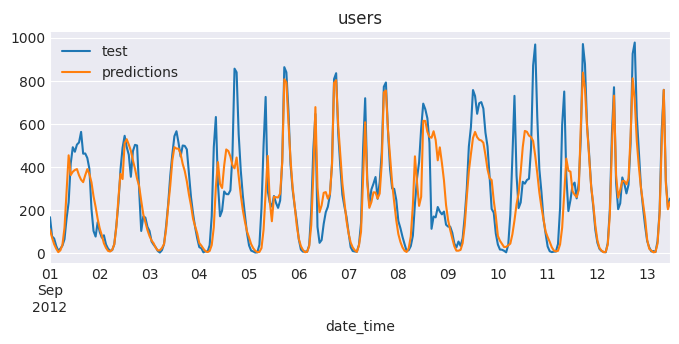

In [26]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["users"][:300].plot(ax=ax, label="test")
predictions["pred"][:300].plot(ax=ax, label="predictions")
ax.set_title("users")
ax.legend();

# LSTM

In [11]:
%load_ext autoreload
%autoreload 2
# Libraries
# ==============================================================================
import os
os.environ["KERAS_BACKEND"] = "torch"  # 'tensorflow', 'jax´ or 'torch'
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import skforecast
from skforecast.plot import set_dark_theme
from skforecast.datasets import fetch_dataset
from skforecast.deep_learning import ForecasterRnn
from skforecast.deep_learning.utils import create_and_compile_model
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_forecaster_multiseries

from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('once')

print(f"skforecast version: {skforecast.__version__}")
print(f"keras version: {keras.__version__}")

if keras.__version__ > "3.0":
    print(f"Using backend: {keras.backend.backend()}")
    if keras.backend.backend() == "tensorflow":
        import tensorflow
        print(f"tensorflow version: {tensorflow.__version__}")
    elif keras.backend.backend() == "torch":
        import torch
        print(f"torch version: {torch.__version__}")
    else:
        print("Backend not recognized. Please use 'tensorflow' or 'torch'.")

skforecast version: 0.15.0
keras version: 3.7.0
Using backend: torch
torch version: 2.5.1+cu124


In [ ]:
# Create model
# ==============================================================================
series = ["users"]  # Series used as predictors
levels = ["users"]  # Target series to predict
lags = 24  # Past time steps to be used to predict the target
steps = 36  # Future time steps to be predicted

model = create_and_compile_model_exo(
    series=data_train[["users"]],
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 100],
    dense_units=[64],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

NameError: name 'create_and_compile_model_exo' is not defined

keras version: 3.7.0
Using backend: torch
torch version: 2.5.1+cu124


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 24, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         2,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 36, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,004 (507.83 KB)

 Trainable params: 130,004 (507.83 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Forecaster Creation
# ==============================================================================
forecaster_rnn = ForecasterRnn(
    regressor=model,
    levels=levels,
    steps=steps,
    lags=lags,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 100,  # Number of epochs to train the model.
        "batch_size": 1024,  # Batch size to train the model.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val[series],  # Validation data for model training.
    },
)    

forecaster_rnn

ForecasterRnn 
Regressor: <Functional name=functional, built=True> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for series: MinMaxScaler() 
Window size: 24 
Target series, levels: ['users'] 
Multivariate series (names): None 
Maximum steps predicted: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] 
Training range: None 
Training index type: None 
Training index frequency: None 
Model parameters: {'name': 'functional', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None},

In [14]:
# Fit forecaster
# ==============================================================================
forecaster_rnn.fit(data_train[series])

Using device: cuda
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0359 - val_loss: 0.0707
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0224 - val_loss: 0.0697
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0214 - val_loss: 0.0701
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0212 - val_loss: 0.0641
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0201 - val_loss: 0.0603
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0194 - val_loss: 0.0563
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0175 - val_loss: 0.0496
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0159 - val_loss: 0.0473
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0152 - val_loss: 0.0456
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0135 - val_loss: 0.0424
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0129 - val_loss: 0.0387
Epoch 12/100
11/11 ━━━━━━━━━━━━━━

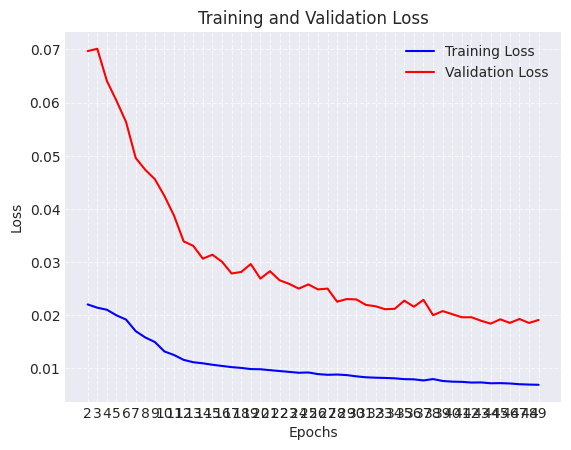

In [15]:
fig = forecaster_rnn.plot_history(exclude_first_iteration=True)

In [16]:
# Prediction
# ==============================================================================
predictions = forecaster_rnn.predict()
predictions.head()

,users
2012-04-01 00:00:00,39.922997
2012-04-01 01:00:00,10.841649
2012-04-01 02:00:00,19.698368
2012-04-01 03:00:00,59.609112
2012-04-01 04:00:00,20.741774


In [17]:
# Backtest model on test data
# ==============================================================================
cv = TimeSeriesFold(
        steps              = 36,
        initial_train_size = len(data[:end_validation]),
        refit              = False,
)
metric, predictions = backtesting_forecaster_multiseries(
                            forecaster    = forecaster_rnn,
                            series        = data[series],
                            cv            = cv,
                            metric        = 'mean_absolute_error',
                            n_jobs        = 'auto',
                            verbose       = False, # Change to False to see less information
                            show_progress = True
                       )
predictions.head()

Using device: cuda
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0156 - val_loss: 0.0218
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0123 - val_loss: 0.0194
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0110 - val_loss: 0.0184
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0102 - val_loss: 0.0190
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0101 - val_loss: 0.0166
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0096 - val_loss: 0.0166
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0094 - val_loss: 0.0172
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0094 - val_loss: 0.0164
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0092 - val_loss: 0.0162
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0091 - val_loss: 0.0167
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0092 - val_loss: 0.0156
Epoch 12/100
15/15 ━━━━━━━━━━━━━━

100%|██████████| 81/81 [00:03<00:00, 21.76it/s]


,users
2012-09-01 00:00:00,104.438576
2012-09-01 01:00:00,58.111397
2012-09-01 02:00:00,59.113281
2012-09-01 03:00:00,67.440552
2012-09-01 04:00:00,31.024454


In [18]:
# Backtesting error
# ==============================================================================
metric

,levels,mean_absolute_error
0,users,84.549116


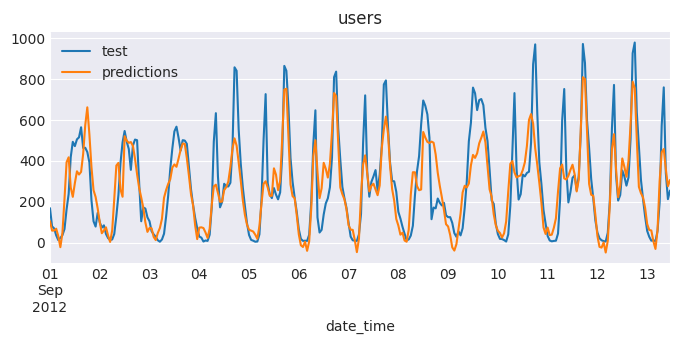

In [21]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["users"][:300].plot(ax=ax, label="test")
predictions["users"][:300].plot(ax=ax, label="predictions")
ax.set_title("users")
ax.legend();

## Exogenous Variables


So far, only lagged values of the time series have been used as predictors. However, it is possible to include other variables as predictors. These variables are known as exogenous variables (features) and their use can improve the predictive capacity of the model. A very important point to keep in mind is that the values of the exogenous variables must be known at the time of prediction.

Common examples of exogenous variables are those derived from the calendar, such as the day of the week, month, year, or holidays. Weather variables such as temperature, humidity, and wind also fall into this category, as do economic variables such as inflation and interest rates.

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100; border-color: #ff9100; padding-left: 10px; padding-right: 10px">

<p class="title">
    <i style="font-size: 18px; color:#ff9100; border-color: #ff1744;"></i>
    <b style="color: #ff9100;"> <span style="color: #ff9100;">&#9888;</span> Warning</b>
</p>

Exogenous variables must be known at the time of the forecast. For example, if temperature is used as an exogenous variable, the temperature value for the next hour must be known at the time of the forecast. If the temperature value is not known, the forecast will not be possible.
<br><br>
Weather variables should be used with caution. When the model is deployed into production, future weather conditions are not known, but are predictions made by meteorological services. Because they are predictions, they introduce errors into the forecasting model. As a result, the model's predictions are likely to get worse. One way to anticipate this problem, and to know (not avoid) the expected performance of the model, is to use the weather forecasts available at the time the model is trained, rather than the recorded conditions.

</div>

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

For a more detailed explanation of how to use exogenous variables, such as categorical features, visit:

<ul>
    <li><a href="https://skforecast.org/0.12.1/user_guides/categorical-features">Categorical features in time series forecasting</a></li>
    <li><a href="https://skforecast.org/latest/faq/cyclical-features-time-series.html">Cyclical features in time series forecasting</a></li>
</ul>

</div>

In [27]:
# Variables included as exogenous features
# ==============================================================================
exog_features = [
    'month_sin', 
    'month_cos',
    'week_of_year_sin',
    'week_of_year_cos',
    'week_day_sin',
    'week_day_cos',
    'hour_day_sin',
    'hour_day_cos',
    'sunrise_hour_sin',
    'sunrise_hour_cos',
    'sunset_hour_sin',
    'sunset_hour_cos',
    'holiday_previous_day',
    'holiday_next_day',
    'temp_roll_mean_1_day',
    'temp_roll_mean_7_day',
    'temp_roll_max_1_day',
    'temp_roll_min_1_day',
    'temp_roll_max_7_day',
    'temp_roll_min_7_day',
    'temp',
    'holiday'
]

In [28]:
# Backtesting model with exogenous variables on test data
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster    = forecaster_lgbm,
                            y             = data['users'],
                            exog          = data[exog_features],
                            cv            = cv,
                            metric        = 'mean_absolute_error',
                            n_jobs        = 'auto',
                            verbose       = False,
                            show_progress = True
                      )
metric

100%|██████████| 81/81 [00:02<00:00, 35.26it/s]


,mean_absolute_error
0,59.579518


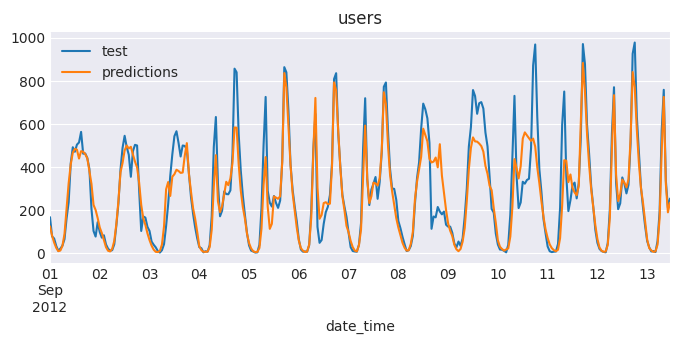

In [29]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["users"][:300].plot(ax=ax, label="test")
predictions["pred"][:300].plot(ax=ax, label="predictions")
ax.set_title("users")
ax.legend();

Adding exogenous variables to the model improves its predictive capacity.

In [35]:
from skforecast.deep_learning.utils import create_and_compile_model_exo

In [49]:
# Create model
# ==============================================================================
series = ["users"]  # Series used as predictors
levels = ["users"]  # Target series to predict
lags = 24  # Past time steps to be used to predict the target
steps = 36  # Future time steps to be predicted

model = create_and_compile_model_exo(
    series=data_train[series],
    levels=levels, 
    lags=lags,
    steps=steps,
    exog=data[exog_features],
    recurrent_layer="LSTM",
    recurrent_units=[200, 200],
    dense_units=[64],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 24, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 24, 200)   │    161,600 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 200)       │    320,800 │ lstm_14[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 200)       │          0 │ lstm_15[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 222)       │          0 │ flatten_5[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │     14,272 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 36)        │      2,340 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 36, 1)     │          0 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 499,012 (1.90 MB)

 Trainable params: 499,012 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Backtest model on test data
# ==============================================================================
cv = TimeSeriesFold(
        steps              = 36,
        initial_train_size = len(data[:end_validation]),
        refit              = False,
)
metric, predictions = backtesting_forecaster_multiseries(
                            forecaster    = forecaster_rnn,
                            series        = data[series],
                            cv            = cv,
                            metric        = 'mean_absolute_error',
                            n_jobs        = 'auto',
                            verbose       = False, # Change to False to see less information
                            show_progress = True
                       )
predictions.head()

Using device: cuda
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0156 - val_loss: 0.0217
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0127 - val_loss: 0.0198
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0110 - val_loss: 0.0182
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0103 - val_loss: 0.0176
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0099 - val_loss: 0.0173
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0098 - val_loss: 0.0166
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0095 - val_loss: 0.0169
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0098 - val_loss: 0.0173
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0100 - val_loss: 0.0160
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0092 - val_loss: 0.0159
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0093 - val_loss: 0.0161
Epoch 12/100
15/15 ━━━

100%|██████████| 81/81 [00:05<00:00, 13.78it/s]


,users
2012-09-01 00:00:00,165.258133
2012-09-01 01:00:00,92.544823
2012-09-01 02:00:00,36.394592
2012-09-01 03:00:00,32.448765
2012-09-01 04:00:00,59.948929


In [48]:
metric

,levels,mean_absolute_error
0,users,86.524935


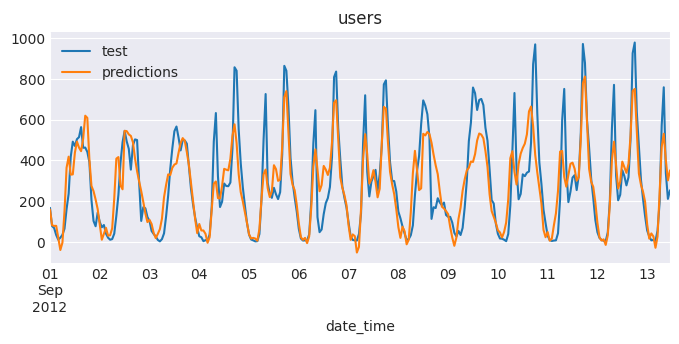

In [45]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["users"][:300].plot(ax=ax, label="test")
predictions["users"][:300].plot(ax=ax, label="predictions")
ax.set_title("users")
ax.legend();

## Hyperparameter tuning


Hyperparameter tuning is a critical step in developing effective machine learning models. The `ForecasterAutoreg` used in the previous sections included a `LGMBRegressor` model with the default hyperparameters. However, there is no reason why these values are the most appropriate. To find the best hyperparameters, a [Bayesian Search](https://skforecast.org/latest/user_guides/hyperparameter-tuning-and-lags-selection#bayesian-search) is performed using the `bayesian_search_forecaster()` function. The search is carried out using the same backtesting process as before, but each time, the model is trained with different combinations of hyperparameters and lags. It is important to note that the hyperparameter search must be done using the validation set, so the test data is never used.

The search is performed by testing each combination of hyperparameters and lags as follows:

1. Train the model using only the training set.

2. The model is evaluated using the validation set via backtesting.

3. Select the combination of hyperparameters and lags that gives the lowest error.

4. Train the model again using the best combination found, this time using both the training and validation data.

By following these steps, one can obtain a model with optimized hyperparameters and avoid overfitting.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

Starting at version <code>0.12.0</code>, lags are included in the search space (<code>search_space</code>).
</div>

In [14]:
# Hyperparameters search
# ==============================================================================
# Create forecaster
forecaster = ForecasterRecursive(
                regressor       = LGBMRegressor(random_state=15926, verbose=-1),
                lags            = 24,
                window_features = window_features
            )


# Lags grid
lags_grid = [48, 72, [1, 2, 3, 23, 24, 25, 167, 168, 169]]

# Regressor hyperparameters search space
def search_space(trial):
    search_space  = {
        'n_estimators'    : trial.suggest_int('n_estimators', 400, 1200, step=100),
        'max_depth'       : trial.suggest_int('max_depth', 3, 10, step=1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 25, 500),
        'learning_rate'   : trial.suggest_float('learning_rate', 0.01, 0.5),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1, step=0.1),
        'max_bin'         : trial.suggest_int('max_bin', 50, 250, step=25),
        'reg_alpha'       : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'      : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'lags'            : trial.suggest_categorical('lags', lags_grid)
    } 
    return search_space

# Folds
cv_searh = TimeSeriesFold(
                steps              = 36,
                initial_train_size = len(data_train),
                refit              = False,
            )

results_search, frozen_trial = bayesian_search_forecaster(
                                    forecaster    = forecaster,
                                    y             = data.loc[:end_validation, 'users'],
                                    exog          = data.loc[:end_validation, exog_features],
                                    search_space  = search_space,
                                    cv            = cv_searh,
                                    metric        = 'mean_absolute_error',
                                    n_trials      = 20,
                                    random_state  = 123,
                                    return_best   = True,
                                    n_jobs        = 'auto',
                                    verbose       = False,
                                    show_progress = True
                                )
best_params = results_search['params'].iat[0]
best_lags = results_search['lags'].iat[0]

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 900, 'max_depth': 9, 'min_data_in_leaf': 26, 'learning_rate': 0.18505894103437742, 'feature_fraction': 0.9, 'max_bin': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.0}
  Backtesting metric: 69.71461721247047


In [15]:
# Search results
# ==============================================================================
results_search.head(3)

,lags,params,mean_absolute_error,n_estimators,max_depth,min_data_in_leaf,learning_rate,feature_fraction,max_bin,reg_alpha,reg_lambda
0,"[1, 2, 3, 23, 24, 25, 167, 168, 169]","{'n_estimators': 900, 'max_depth': 9, 'min_dat...",69.714617,900.0,9.0,26.0,0.185059,0.9,100.0,0.0,0.0
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'n_estimators': 400, 'max_depth': 9, 'min_dat...",70.098073,400.0,9.0,404.0,0.188182,0.6,150.0,0.2,0.0
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'n_estimators': 1000, 'max_depth': 7, 'min_da...",71.390424,1000.0,7.0,368.0,0.168250,0.7,100.0,0.3,0.6


Since `return_best` has been set to `True`, the forecaster object is automatically updated with the best configuration found and trained on the entire dataset. This final model can then be used for future predictions on new data.

In [16]:
# Best model
# ==============================================================================
forecaster

=================== 
ForecasterRecursive 
=================== 
Regressor: LGBMRegressor 
Lags: [  1   2   3  23  24  25 167 168 169] 
Window features: ['roll_mean_72'] 
Window size: 169 
Exogenous included: True 
Exogenous names: 
    month_sin, month_cos, week_of_year_sin, week_of_year_cos, week_day_sin,
    week_day_cos, hour_day_sin, hour_day_cos, sunrise_hour_sin,
    sunrise_hour_cos, sunset_hour_sin, sunset_hour_cos, holiday_previous_day,
    holiday_next_day, temp_roll_mean_1_day, temp_roll_mean_7_day,
    temp_roll_max_1_day, temp_roll_min_1_day, temp_roll_max_7_day,
    temp_roll_min_7_day, temp, holiday 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('2011-01-08 00:00:00'), Timestamp('2012-08-31 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: h 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.18505894103437742,
    'max_depth': 9, 'min_child_samples': 20, 'min_child_weight': 0.001,
    'min_split_gain': 0.0, 'n_estimators': 900, 'n_jobs': None, 'num_leaves':
    31, 'objective': None, 'random_state': 15926, 'reg_alpha': 0.0,
    'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000,
    'subsample_freq': 0, 'verbose': -1, 'min_data_in_leaf': 26,
    'feature_fraction': 0.9, 'max_bin': 100} 
fit_kwargs: {} 
Creation date: 2024-11-14 21:00:45 
Last fit date: 2024-11-14 21:02:09 
Skforecast version: 0.14.0 
Python version: 3.12.5 
Forecaster id: None


Once the best combination of hyperparameters has been identified **using the validation data**, the predictive capacity of the model is evaluated when applied to the test set. It is highly recommended to review the documentation for the [backtesting_forecaster()](https://skforecast.org/latest/user_guides/backtesting.html) function to gain a better understanding of its capabilities. This will help to utilize its full potential to analyze the predictive ability of the model.

In [17]:
# Backtesting model with exogenous variables on test data
# ==============================================================================
metric, predictions = backtesting_forecaster(
                            forecaster    = forecaster,
                            y             = data['users'],
                            exog          = data[exog_features],
                            cv            = cv,
                            metric        = 'mean_absolute_error',
                            n_jobs        = 'auto',
                            verbose       = False,
                            show_progress = True
                       )
display(metric)
predictions.head()

  0%|          | 0/81 [00:00<?, ?it/s]

,mean_absolute_error
0,57.180266


,pred
2012-09-01 00:00:00,148.990798
2012-09-01 01:00:00,119.511529
2012-09-01 02:00:00,96.210663
2012-09-01 03:00:00,40.839404
2012-09-01 04:00:00,21.862018


In [18]:
# Plot predictions vs real value
# ======================================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['users'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Date time",
    yaxis_title="Users",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(orientation="h", yanchor="top", y=1.1, xanchor="left", x=0.001)
)
fig.show()

After optimizing lags and hyperparameters, the prediction error of the autoregressive model is reduced.

## Feature selection

Feature selection is the process of selecting a subset of relevant features for use in model construction. It is an important step in the machine learning process, as it can help to reduce overfitting, improve model accuracy, and reduce training time. Since the underlying regressors of skforecast follow the scikit-learn API, it is possible to apply the [feature selection methods](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) available in scikit-learn with the function `select_features()`.  Two of the most popular methods are [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) and [Sequential Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection).

<div class="admonition note" name="html-admonition" style="background: rgba(0,191,191,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00bfa5; border-color: #00bfa5; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00bfa5;"></i>
    <b style="color: #00bfa5;">&#128161 Tip</b>
</p>

Feature selection is a powerful tool for improving the performance of machine learning models. However, it is computationally expensive and can be time-consuming. Since the goal is to find the best subset of features, not the best model, it is not necessary to use the entire data set or a highly complex model. Instead, it is recommended to use a <b>small subset of the data and a simple model</b>. Once the best subset of features has been identified, the model can then be trained using the entire dataset and a more complex configuration.

</div>

In [19]:
# Create forecaster
# ==============================================================================
regressor = LGBMRegressor(
    n_estimators       = 100,
    max_depth          = 5,
    random_state       = 15926,
    verbose            = -1
)
forecaster = ForecasterRecursive(
    regressor       = regressor,
    lags            = [1, 2, 3, 23, 24, 25, 167, 168, 169],
    window_features = window_features
)

# Recursive feature elimination with cross-validation
# ==============================================================================
selector = RFECV(
    estimator = regressor,
    step      = 1,
    cv        = 3,
    n_jobs    = -1
)
lags_select, window_features_select, exog_select = select_features(
    forecaster      = forecaster,
    selector        = selector,
    y               = data_train['users'],  
    exog            = data_train[exog_features],
    select_only     = None,
    force_inclusion = None,
    subsample       = 0.5,
    random_state    = 123,
    verbose         = True,
)

/home/ubuntu/anaconda3/envs/skforecast_14_py12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=43434) is multi-threaded, use of fork() may lead to deadlocks in the child.



Recursive feature elimination (RFECV)
-------------------------------------
Total number of records available: 10607
Total number of records used for feature selection: 5303
Number of features available: 32
    Lags            (n=9)
    Window features (n=1)
    Exog            (n=22)
Number of features selected: 25
    Lags            (n=9) : [1, 2, 3, 23, 24, 25, 167, 168, 169]
    Window features (n=1) : ['roll_mean_72']
    Exog            (n=15) : ['month_sin', 'month_cos', 'week_of_year_sin', 'week_of_year_cos', 'week_day_sin', 'week_day_cos', 'hour_day_sin', 'hour_day_cos', 'temp_roll_mean_1_day', 'temp_roll_mean_7_day', 'temp_roll_max_1_day', 'temp_roll_min_1_day', 'temp_roll_max_7_day', 'temp_roll_min_7_day', 'temp']


Scikit-learn's `RFECV` starts by training a model on the initial set of features, and obtaining the importance of each feature (through attributes such as `coef_` or `feature_importances_`). Then, in each round, the least important features are iteratively removed, followed by cross-validation to calculate the performance of the model with the remaining features. This process continues until further feature removal doesn't improve or starts to degrade the performance of the model (based on a chosen metric), or the `min_features_to_select` is reached.

The final result is an optimal subset of features that ideally balances model simplicity and predictive power, as determined by the cross-validation process.

The forecaster is trained and re-evaluated using the best subset of features.

In [20]:
# Create a forecaster with the selected features
# ==============================================================================
forecaster = ForecasterRecursive(
    regressor       = LGBMRegressor(**best_params, random_state=15926, verbose=-1),
    lags            = lags_select,
    window_features = window_features
)

# Backtesting model with exogenous variables on test data
# ==============================================================================
metric, predictions = backtesting_forecaster(
    forecaster    = forecaster,
    y             = data['users'],
    exog          = data[exog_select],
    cv            = cv,
    metric        = 'mean_absolute_error',
    n_jobs        = 'auto',
    verbose       = False,
    show_progress = True
)
metric

  0%|          | 0/81 [00:00<?, ?it/s]

,mean_absolute_error
0,57.660742


The performance of the model remains similar to that of the model trained with all the features. However, the model is now simpler, which will make it faster to train and less prone to overfitting.

In [21]:
# Actualizar las variables exógenas utilizadas
# ==============================================================================
exog_features = exog_select

## Model explanaibility

Due to the complex nature of many modern machine learning models, such as ensemble methods, they often function as black boxes, making it difficult to understand why a particular prediction was made. Explanability techniques aim to demystify these models, providing insight into their inner workings and helping to build trust, improve transparency, and meet regulatory requirements in various domains. Enhancing model explainability not only helps to understand model behavior, but also helps to identify biases, improve model performance, and enable stakeholders to make more informed decisions based on machine learning insights.

Skforecast is compatible with some of the most popular model explainability methods: [model-specific feature importances, SHAP values, and partial dependence plots](https://skforecast.org/latest/user_guides/explainability).

In [22]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterRecursive(
    regressor       = LGBMRegressor(**best_params, random_state=15926, verbose=-1),
    lags            = lags_select,
    window_features = window_features
)
forecaster.fit(
    y    = data.loc[:end_validation, 'users'],
    exog = data.loc[:end_validation, exog_features]
)

### Model-specific feature importance

In [23]:
# Extract feature importance
# ==============================================================================
importance = forecaster.get_feature_importances()
importance.head(10)

,feature,importance
0,lag_1,2204
6,lag_167,1910
2,lag_3,1811
7,lag_168,1798
4,lag_24,1740
1,lag_2,1721
8,lag_169,1680
3,lag_23,1667
5,lag_25,1629
9,roll_mean_72,1545


<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100; border-color: #ff9100; padding-left: 10px; padding-right: 10px">

<p class="title">
    <i style="font-size: 18px; color:#ff9100; border-color: #ff1744;"></i>
    <b style="color: #ff9100;"> <span style="color: #ff9100;">&#9888;</span> Warning</b>
</p>

The <code>get_feature_importances()</code> method will only return values if the forecaster's regressor has either the <code>coef_</code> or <code>feature_importances_</code> attribute, which is the default in scikit-learn.

</div>

### Shap values

SHAP (SHapley Additive exPlanations) values are a popular method for explaining machine learning models, as they help to understand how variables and values influence predictions visually and quantitatively.

It is possible to generate SHAP-values explanations from skforecast models with just two essential elements:

+ The internal regressor of the forecaster.

+ The training matrices created from the time series and used to fit the forecaster.

By leveraging these two components, users can create insightful and interpretable explanations for their skforecast models. These explanations can be used to verify the reliability of the model, identify the most significant factors that contribute to model predictions, and gain a deeper understanding of the underlying relationship between the input variables and the target variable.

In [24]:
# Training matrices used by the forecaster to fit the internal regressor
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(
                       y    = data.loc[:end_validation, 'users'],
                       exog = data.loc[:end_validation, exog_features]
                   )
display(X_train.head(3))
display(y_train.head(3))

,lag_1,lag_2,lag_3,lag_23,lag_24,lag_25,lag_167,lag_168,lag_169,roll_mean_72,...,week_day_cos,hour_day_sin,hour_day_cos,temp_roll_mean_1_day,temp_roll_mean_7_day,temp_roll_max_1_day,temp_roll_min_1_day,temp_roll_max_7_day,temp_roll_min_7_day,temp
date_time,,,,,,,,,,,,,,,,,,,,,
2011-01-15 01:00:00,28.0,27.0,36.0,1.0,5.0,14.0,16.0,16.0,25.0,55.736111,...,0.62349,0.500000,0.866025,6.594167,6.535595,9.84,4.1,9.84,3.28,6.56
2011-01-15 02:00:00,20.0,28.0,27.0,1.0,1.0,5.0,7.0,16.0,16.0,55.930556,...,0.62349,0.707107,0.707107,6.696667,6.530715,9.84,4.1,9.84,3.28,6.56
2011-01-15 03:00:00,12.0,20.0,28.0,1.0,1.0,1.0,1.0,7.0,16.0,56.083333,...,0.62349,0.866025,0.500000,6.799167,6.525833,9.84,4.1,9.84,3.28,6.56


date_time
2011-01-15 01:00:00    20.0
2011-01-15 02:00:00    12.0
2011-01-15 03:00:00     8.0
Freq: h, Name: y, dtype: float64

In [25]:
# Create SHAP explainer (for three base models)
# ==============================================================================
explainer = shap.TreeExplainer(forecaster.regressor)

# Sample 50% of the data to speed up the calculation
rng = np.random.default_rng(seed=785412)
sample = rng.choice(X_train.index, size=int(len(X_train)*0.5), replace=False)
X_train_sample = X_train.loc[sample, :]
shap_values = explainer.shap_values(X_train_sample)

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

Shap library has several explainers, each designed for a different type of model. The <code>shap.TreeExplainer</code> explainer is used for tree-based models, such as the <code>LGBMRegressor</code> used in this example. For more information, see the <a href="https://shap.readthedocs.io/en/latest/tabular_examples.html">SHAP documentation</a>.

</div>

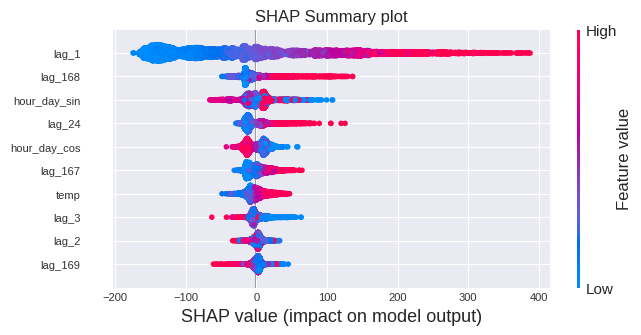

In [26]:
# Shap summary plot (top 10)
# ==============================================================================
shap.initjs()
shap.summary_plot(shap_values, X_train_sample, max_display=10, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_title("SHAP Summary plot")
ax.tick_params(labelsize=8)
fig.set_size_inches(7, 3)

In [27]:
# Force plot for the first observation
# ==============================================================================
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_sample.iloc[0,:])

## Session information

In [28]:
import session_info
session_info.show(html=False)

-----
lightgbm            4.4.0
matplotlib          3.9.2
numpy               2.0.2
optuna              3.6.1
pandas              2.2.3
plotly              5.24.1
session_info        1.0.0
shap                0.46.0
skforecast          0.14.0
sklearn             1.5.1
statsmodels         0.14.3
-----
IPython             8.27.0
jupyter_client      8.6.3
jupyter_core        5.7.2
notebook            6.4.12
-----
Python 3.12.5 | packaged by Anaconda, Inc. | (main, Sep 12 2024, 18:27:27) [GCC 11.2.0]
Linux-5.15.0-1072-aws-x86_64-with-glibc2.31
-----
Session information updated at 2024-11-14 21:02


## Bibliography

Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia.

Time Series Analysis and Forecasting with ADAM Ivan Svetunkov.

Joseph, M. (2022). Modern time series forecasting with Python: Explore industry-ready time series forecasting using modern machine learning and Deep Learning. Packt Publishing.

## Citation

**How to cite this document**

If you use this document or any part of it, please acknowledge the source, thank you!

<p style="text-align:left"><font size="3" color="#555">
Forecasting time series with gradient LightGBM by Joaquín Amat Rodrigo and Javier Escobar Ortiz, available under a Attribution-NonCommercial-ShareAlike 4.0 International at https://www.cienciadedatos.net/documentos/py58-forecasting-time-series-with-lightgbm.html
</font></p>

**How to cite skforecast**

If you use skforecast for a publication, we would appreciate it if you cite the published software.

Zenodo:

<p style="text-align:left"><font size="3" color="#555">
Amat Rodrigo, Joaquin, & Escobar Ortiz, Javier. (2024). skforecast (v0.14.0). Zenodo. https://doi.org/10.5281/zenodo.8382788
</font></p>

APA:

<p style="text-align:left"><font size="3" color="#555">
Amat Rodrigo, J., & Escobar Ortiz, J. (2024). skforecast (Version 0.14.0) [Computer software]. https://doi.org/10.5281/zenodo.8382788
</font></p>

BibTeX:

<p style="text-align:left"><font size="3" color="#555">
@software{skforecast,
author = {Amat Rodrigo, Joaquin and Escobar Ortiz, Javier},
title = {skforecast},
version = {0.14.0},
month = {11},
year = {2024},
license = {BSD-3-Clause},
url = {https://skforecast.org/},
doi = {10.5281/zenodo.8382788}
}
</font></p>

<p><br></p>
<p><strong>Did you like the article? Your support is important</strong></p>
<p style="text-align:left">
    <font size="3" color="#555">
        Website maintenance has high cost, your contribution will help me to continue generating free educational content. Many thanks! &#128522;
    </font>
    <form action="https://www.paypal.com/donate" method="post" target="_top">
        <input type="hidden" name="hosted_button_id" value="6NULYFYDKFTQL" />
        <input type="image" src="https://www.paypalobjects.com/en_US/ES/i/btn/btn_donateCC_LG.gif" border="0" name="submit" title="PayPal - The safer, easier way to pay online!" alt="Donate with PayPal button" />
        <img alt="" border="0" src="https://www.paypal.com/en_ES/i/scr/pixel.gif" width="1" height="1" />
    </form>	
</p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-nc-sa.svg" /></a><br/>

This work by  Joaquín Amat Rodrigo and Javier Escobar Ortiz is licensed under a <a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"> Attribution-NonCommercial-ShareAlike 4.0 International</a>.

<p style="text-align:left"><font size="3" color="#555">Allowed:</font></p>

<ul>
<li>
  <p style="text-align:left"><font size="3" color="#555">Share: copy and redistribute the material in any medium or format.</font></p>
</li>
<li>
  <p style="text-align:left"><font size="3" color="#555">Adapt: remix, transform, and build upon the material.</font></p>
</li>
</ul>

<p style="text-align:left"><font size="3" color="#555">Under the following terms:</font></p>

<ul>
<li>
  <p style="text-align:left"><font size="3" color="#555">Attribution: You must give <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en#ref-appropriate-credit">appropriate credit</a>, provide a link to the license, and <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en#ref-indicate-changes">indicate if changes were made</a>. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.</font></p>
</li>

<li>
  <p style="text-align:left"><font size="3" color="#555">NonCommercial: You may not use the material for <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en#ref-commercial-purposes">commercial purposes</a>.</font></p>
</li>

<li>
  <p style="text-align:left"><font size="3" color="#555">ShareAlike: If you remix, transform, or build upon the material, you must distribute your contributions under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en#ref-same-license">same license</a> as the original.</font></p>
</li>
</ul>

In [29]:
%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans', 'Helvetica Neue', Helvetica, Arial, sans-serif;
    font-size: 16px; 
    line-height: 1.6;
    font-weight: 400;
    text-shadow: none;
    color: #2c2c2c;
    text-rendering: optimizeLegibility;
    letter-spacing: 0.1px;
    margin-bottom: 1.15rem;
}

div.admonition.note {
    text-align: justify;
    font-family: 'Open Sans', 'Helvetica Neue', Helvetica, Arial, sans-serif;
    font-size: 15px; 
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: 0.1px;
    margin-bottom: 1.15rem;
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-left: auto;
    margin-right: auto;
}


.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    padding: 2px 4px;
    border: solid thin darkgray;
    border-radius: 3px;
}

.rendered_html h1 {
    padding-top: 3vh;
}

.rendered_html h2 {
    margin-top: 0;
    font-size: 2.488em;
    margin-bottom: 1.15rem;
}

.rendered_html h3 {
    font-size: 25px;
    margin-bottom: 1.15rem;
}

.rendered_html h4 {
    font-size: 20px;
    margin-bottom: 1.15rem;
}

.rendered_html code:focus {
    outline: 2px solid #007acc;
}

</style>